In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [75]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X,y,true_coefficient=make_regression(n_samples=200,n_features=30,n_informative=10,noise=100,coef=True,random_state=5)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,train_size=60)
print(X_train.shape)
print(X_test.shape)

(60, 30)
(140, 30)


/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression().fit(X_train,y_train)


In [77]:
print("scores on train set",lin_reg.score(X_train,y_train))
print("scores on test set:",lin_reg.score(X_test,y_test))

scores on train set 0.8780111193075131
scores on test set: 0.21633222519002993


In [78]:
#original score
from sklearn.metrics import r2_score
print("score original",r2_score(np.dot(X,true_coefficient),y))

score original 0.5985284495875146


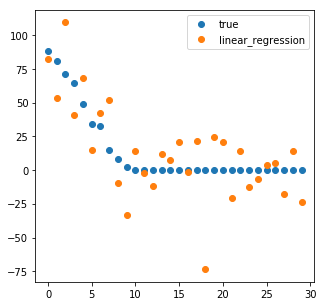

In [79]:
plt.figure(figsize=(5,5))
coef_sorting=np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coef_sorting],"o",label='true')
plt.plot(lin_reg.coef_[coef_sorting],"o",label='linear_regression')
plt.legend()



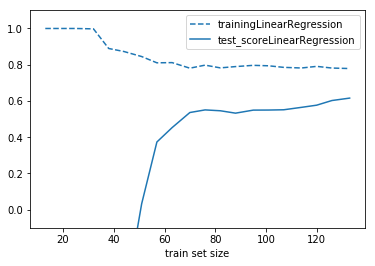

In [80]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est,X,y):
    training_set_size,train_scores,test_scores=learning_curve(est,X,y,train_sizes=np.linspace(.1,1,20))
    estimator_name=est.__class__.__name__
    line=plt.plot(training_set_size,train_scores.mean(axis=1),'--',label='training'+estimator_name)
    plt.plot(training_set_size,test_scores.mean(axis=1),'-',label="test_score"+estimator_name,c=line[0].get_color())
    plt.xlabel("train set size")
    plt.legend(loc='best')
    plt.ylim(-0.1,1.1)
    
plot_learning_curve(LinearRegression(),X,y)

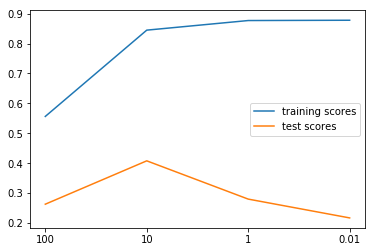

In [81]:
from sklearn.linear_model import Ridge
ridge_models={}
training_scores=[]
test_scores=[]
for alpha in [100,10,1,0.01]:
    ridge=Ridge(alpha=alpha).fit(X_train,y_train)
    training_scores.append(ridge.score(X_train,y_train))
    test_scores.append(ridge.score(X_test,y_test))
    ridge_models[alpha]=ridge
plt.figure()
plt.plot(training_scores,label="training scores")
plt.plot(test_scores,label='test scores')
plt.xticks(range(4),[100,10,1,0.01])
plt.legend(loc='best')    

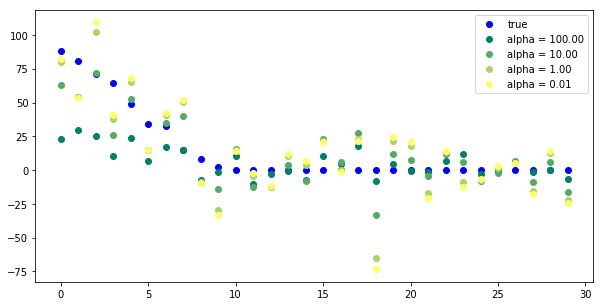

In [85]:
plt.figure(figsize=(10,5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i,alpha in enumerate([100,10,1,0.01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting],'o', label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
plt.legend(loc='best')

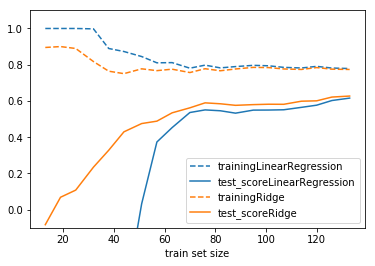

In [87]:
plt.figure()
plot_learning_curve(LinearRegression(),X,y)
plot_learning_curve(Ridge(alpha=10),X,y)

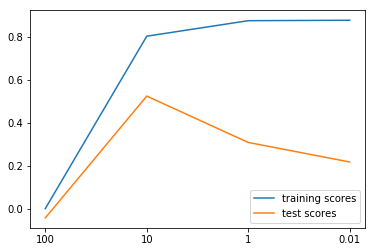

In [88]:
from sklearn.linear_model import Lasso
lasso_models={}
training_scores=[]
test_scores=[]
for alpha in [100,10,1,0.01]:
    lasso=Lasso(alpha=alpha).fit(X_train,y_train)
    training_scores.append(lasso.score(X_train,y_train))
    test_scores.append(lasso.score(X_test,y_test))
    lasso_models[alpha]=lasso
plt.figure()
plt.plot(training_scores,label="training scores")
plt.plot(test_scores,label='test scores')
plt.xticks(range(4),[100,10,1,0.01])
plt.legend(loc='best')    

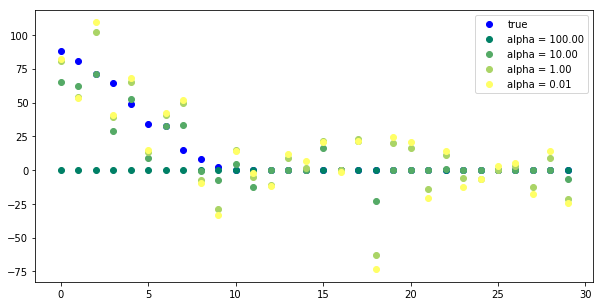

In [91]:
plt.figure(figsize=(10,5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i,alpha in enumerate([100,10,1,0.01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting],'o', label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
plt.legend(loc='best')

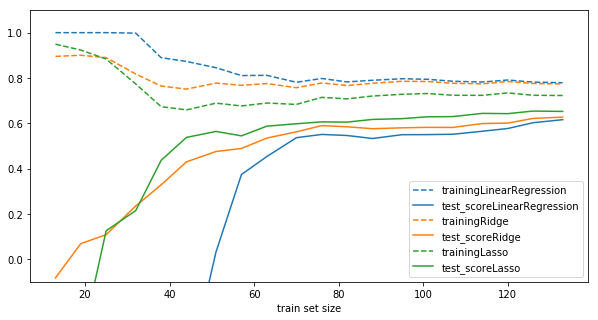

In [92]:
plt.figure(figsize=(10, 5))
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)

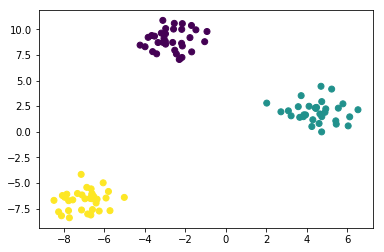

In [96]:
from sklearn.datasets import make_blobs
plt.figure()
X,y=make_blobs(random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)

In [100]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492411  0.23140869]
 [ 0.47621778 -0.06936569]
 [-0.18914169 -0.20400693]]
[-1.07745802  0.13140498 -0.08605025]


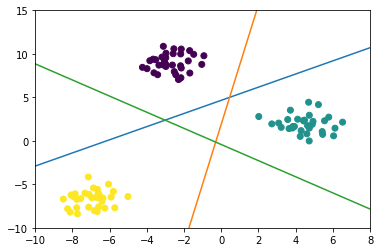

In [108]:
plt.scatter(X[:,0],X[:,1],c=y)
line=np.linspace(-15,15)
for coef,intercept in zip(linear_svm.coef_,linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8);